In [51]:
import pandas as pd
from datetime import timedelta, datetime
import matplotlib.pyplot as plt

# Data Loading

In [58]:
df = pd.read_csv("TSLA_1m_2018_2023.csv")
df

,open,high,low,close,volume,date,time
0,312.0000,312.00,312.00,312.00,200.0,1/2/2018,9:48:00
1,311.8000,311.80,311.80,311.80,300.0,1/2/2018,9:49:00
2,311.5000,311.50,311.50,311.50,847.0,1/2/2018,10:28:00
3,310.9900,310.99,310.99,310.99,307.0,1/2/2018,11:07:00
4,310.9900,310.99,310.99,310.99,126.0,1/2/2018,11:09:00
...,...,...,...,...,...,...,...
858266,113.4401,113.49,113.44,113.47,11318.0,1/7/2023,0:55:00
858267,113.4700,113.60,113.46,113.60,11270.0,1/7/2023,0:56:00
858268,113.5800,113.64,113.50,113.56,6281.0,1/7/2023,0:57:00
858269,113.5600,113.75,113.56,113.69,19954.0,1/7/2023,0:58:00


# Data Cleaning

In [59]:
nan_rows = df[df.isna().any(axis=1)]
print(nan_rows)
df = df.dropna()

          open    high     low   close  volume        date      time
267890  329.94  329.94  329.94  329.94     NaN  11/29/2019  18:15:00


In [60]:
duplicated_rows = df[df.duplicated()]
print(duplicated_rows)
df = df.drop_duplicates()

         open    high    low  close  volume        date     time
282275  462.5  462.87  462.5  462.7  1093.0    1/8/2020  0:00:00
465998  665.0  665.00  665.0  665.0   653.0  12/30/2020  0:00:00


In [61]:
df = df.dropna()
df = df.drop_duplicates()

# Time Adjustments for Daylight Savings

In [62]:
df['time'] = df['time'].str[:-3]
df['date_time'] = df['date'] + ' ' + df['time']
df['date_time'] = pd.to_datetime(df['date_time'], format='%m/%d/%Y %H:%M')  # Adjust the format string accordingly
df.set_index('date_time', inplace=True)
df = df.drop(columns=['date', 'time'])
df

,open,high,low,close,volume
date_time,,,,,
2018-01-02 09:48:00,312.0000,312.00,312.00,312.00,200.0
2018-01-02 09:49:00,311.8000,311.80,311.80,311.80,300.0
2018-01-02 10:28:00,311.5000,311.50,311.50,311.50,847.0
2018-01-02 11:07:00,310.9900,310.99,310.99,310.99,307.0
2018-01-02 11:09:00,310.9900,310.99,310.99,310.99,126.0
...,...,...,...,...,...
2023-01-07 00:55:00,113.4401,113.49,113.44,113.47,11318.0
2023-01-07 00:56:00,113.4700,113.60,113.46,113.60,11270.0
2023-01-07 00:57:00,113.5800,113.64,113.50,113.56,6281.0


In [63]:
mudanca_hora = ['2018/01/02', '2018/03/11', '2018/11/4', '2019/03/10', '2019/11/03',
                '2020/03/08', '2020/11/01', '2021/03/14', '2021/11/07', '2022/03/13',
                '2022/11/06', '2023/01/07'] #formato YYYY/MM/DD

data = []
for i in range (len(mudanca_hora)-1):
    data_int = df.loc[mudanca_hora[i]:mudanca_hora[i+1]]
    if (i % 2 ) == 0 :  #if the index is even
      data_int.index = data_int.index + timedelta(hours=0)
    else:
      data_int.index = data_int.index + timedelta(hours=1)
    data.append(data_int)
df = pd.concat(data)

# Stock Split Adjustment

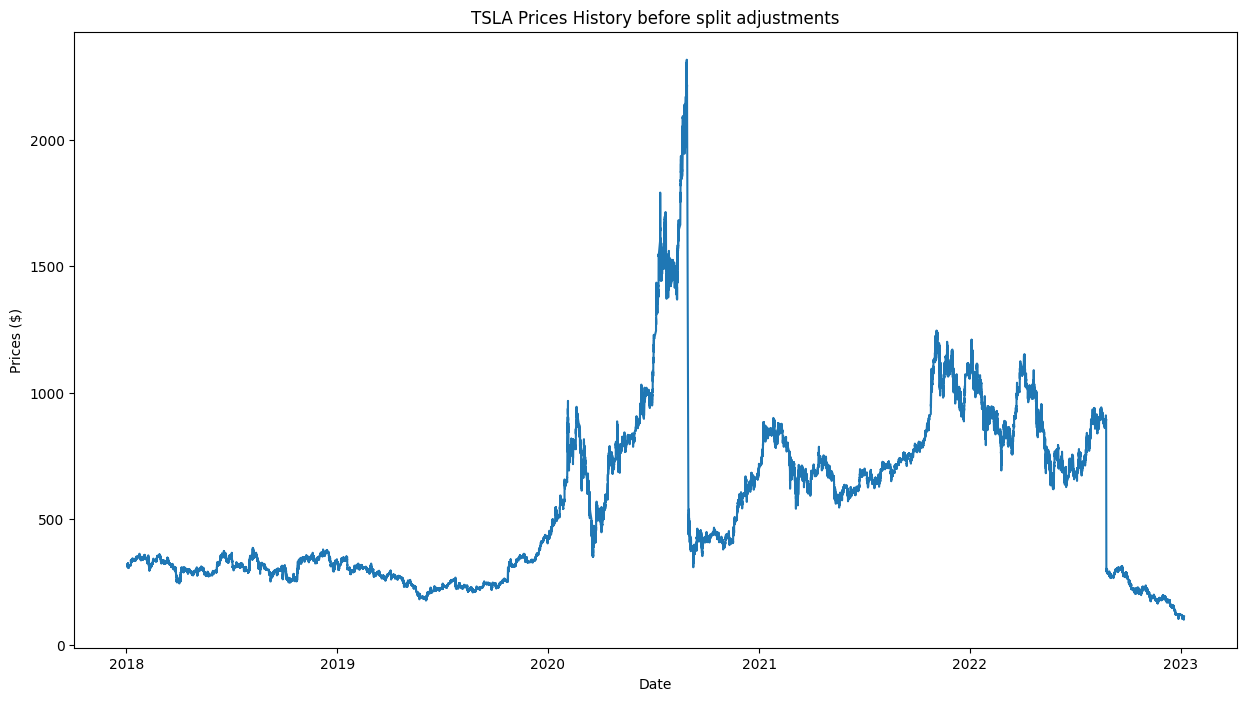

In [64]:
plt.figure(figsize=(15, 8))
plt.title('TSLA Prices History before split adjustments')
plt.plot(df.index, df['close'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')
plt.show()

**Stock split dates and ratio**

> 2020/08/31 -  split:5/1


> 2022/08/25 -  split:3/1






In [66]:
split_dates = []
split_dates.append('2020-08-30')
split_dates.append('2022-08-24')
split1 = 5
split2 = 3
s1 = split1*split2

In [67]:
data = []
df1 = pd.DataFrame(df.loc[:split_dates[0]])
df1['close']=df1['close'].div(s1).round(4)
df1['open']=df1['open'].div(s1).round(4)
df1['high']=df1['high'].div(s1).round(4)
df1['low']=df1['low'].div(s1).round(4)
df1['volume']=df1['volume'].multiply(s1).round(4)
data.append(df1)

#stock split adjustment only starts after 2 a.m. on the 25th

end_date_2am = datetime.strptime(split_dates[1], '%Y-%m-%d') + timedelta(days=1, hours=2)

df2 = pd.DataFrame(df.loc[split_dates[0]:end_date_2am])
df2['close']=df2['close'].div(split2).round(4)
df2['open']=df2['open'].div(split2).round(4)
df2['high']=df2['high'].div(split2).round(4)
df2['low']=df2['low'].div(split2).round(4)
df2['volume']=df2['volume'].multiply(split2).round(4)
data.append(df2)

df3 = pd.DataFrame(df[end_date_2am:])
data.append(df3)

df = pd.concat(data)

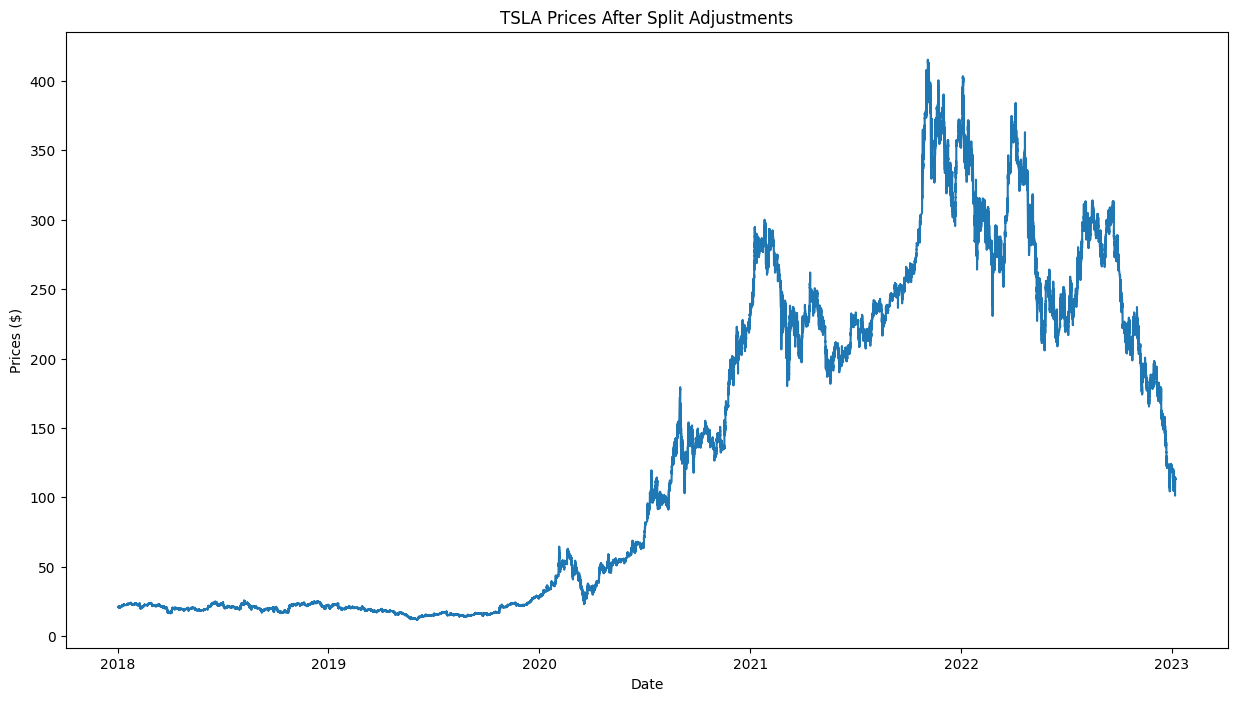

In [68]:
plt.figure(figsize=(15, 8))
plt.title('TSLA Prices After Split Adjustments')
plt.plot(df.index, df['close'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')
plt.show()

# Filtering Market Hours

In [69]:
df_market_hours = df.between_time('14:30','20:59')
df_market_hours.to_csv('TSLA_final_2018_2023.csv', index= True)